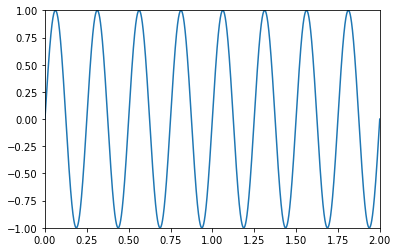

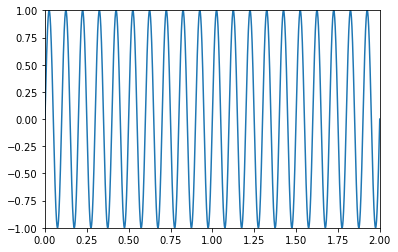

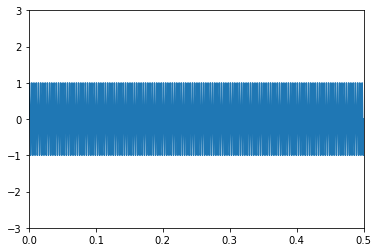

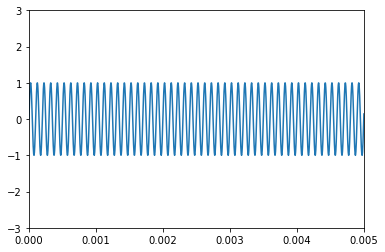

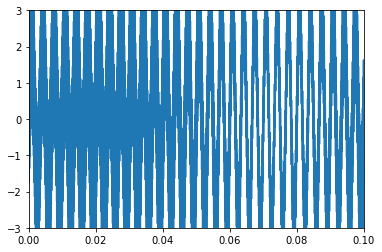

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Modulator
duration = 2
rate = 441000
t = np.arange(0,duration, 1/rate)

f1=4
A1=1
signal = A1*np.sin(2*np.pi*f1*t)

f2=10
A2=1
signal2 = A2*np.sin(2*np.pi*f2*t)


carrierFreq = 300
carrierAmplitude = 1
carrier = carrierAmplitude*np.sin(2*np.pi*carrierFreq*t)

carrierFreq2 = 10000
carrierAmplitude2 = 1
carrier2 = carrierAmplitude2*np.sin(2*np.pi*carrierFreq2*t)


signalOffset = 2
amSignal = (signalOffset+signal)*carrier+(signalOffset+signal2)*carrier2

plt.plot(t,signal)
plt.axis([0,2,-1,1])
plt.show()

plt.plot(t,signal2)
plt.axis([0,2,-1,1])
plt.show()

plt.plot(t,carrier)
plt.axis([0,0.5,-3,3])
plt.show()

plt.plot(t,carrier2)
plt.axis([0,0.005,-3,3])
plt.show()

plt.plot(t,amSignal)
plt.axis([0,0.1,-3,3])
plt.show()

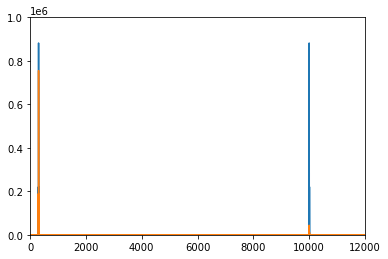

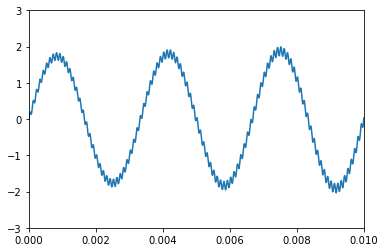

In [18]:
#FFT

fourier=np.fft.rfft(amSignal)

frequencies=np.fft.fftfreq(len(amSignal),1/rate)

frequenciesCut = frequencies[:len(frequencies)//2+1]

plt.plot(frequenciesCut, np.abs(fourier))
plt.axis([0,12000,0,1000000])


#Low pass filter
R=10
C=32*10**(-6)
filteredFourier = fourier * (1+(2*np.pi*frequenciesCut*R*C)**2)**(-1/2)
plt.plot(frequenciesCut,np.abs(filteredFourier))
plt.show()

filteredSignal = np.fft.irfft(filteredFourier)
plt.plot(t,filteredSignal)
plt.axis([0,0.01,-3,3])
plt.show()

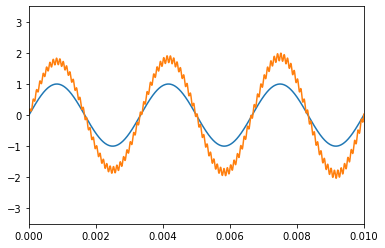

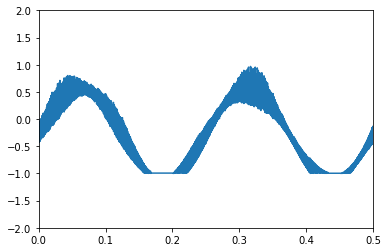

In [32]:
#Demodulator
recoveredSignal = [0] * duration*rate
threshold = 1

plt.plot(t,carrier)
plt.plot(t,filteredSignal)
plt.axis([0,0.01,-3.5,3.5])
plt.show()

for i in range(duration*rate):
    if carrier[i] != 0 and np.abs(filteredSignal[i])>threshold:
        recoveredSignal[i] = filteredSignal[i]/carrier[i]-signalOffset
    else:
        recoveredSignal[i] = recoveredSignal[i-1]
        
plt.plot(t,recoveredSignal)
plt.axis([0,0.5,-2,2])
plt.show()